In [946]:
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from numpy import transpose
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from time import time
import seaborn as sns
#tf.debugging.set_log_device_placement(True)
print(tf.__version__)

2.0.0


In [947]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#c = tf.matmul(a, b)

#print(c)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14460255534651807657
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1772421120
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10814299230734849316
physical_device_desc: "device: 0, name: Quadro K2100M, pci bus id: 0000:01:00.0, compute capability: 3.0"
]


In [948]:
X_train_df = read_csv('X_train.csv', index_col=0)
X_val_df = read_csv('X_val.csv', index_col=0)
test_df = read_csv('X_test.csv', index_col=0)
y_train_df = read_csv('y_train.csv', index_col=0)
y_val_df = read_csv('y_val.csv', index_col=0)

In [18]:
y_train = y_train.SalePrice.values.astype(float)
y_val = y_val.SalePrice.values.astype(float)

In [134]:
X_train = transpose([X_train.Surface.values.astype(float)])
X_val = transpose([X_val.Surface.values.astype(float)])

In [949]:
X_train.shape

(1166, 287)

In [950]:
y_train = y_train_df.values.astype(float)
y_val = y_val_df.values.astype(float)

In [951]:
#X_train = X_train[['Surface','OverallQual']].values.astype(float)
#X_val = X_val[['Surface','OverallQual']].values.astype(float)
X_train = X_train_df.values.astype(float)
X_val = X_val_df.values.astype(float)

In [952]:
X_train.shape

(1166, 287)

In [953]:
from tensorflow.keras.backend import sigmoid, tanh, maximum
def custom(x):
    return maximum(x-2,tanh(x-2)+2)

In [954]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(32,
                kernel_initializer='normal',
                kernel_regularizer=regularizers.l2(0.1),
                activity_regularizer=regularizers.l2(0.1),
                activation='relu'
                ))
#model.add(Activation('relu'))
#model.add(Dense(32))
#model.add(tf.keras.layers.PReLU())
model.add(Dense(1))
#model.add(Activation('elu'))

In [908]:
model = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(1)
])

In [955]:
loss = 'mse'

In [956]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
#model.compile(loss=loss, optimizer=RMSprop(lr=LEARNING_RATE))
#model.compile(loss=loss, optimizer=Adam(lr=LEARNING_RATE))

In [957]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 50000 # how many iterations over the whole dataset
t_0 = time()
#with tf.device('/device:GPU:0'):
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print(time()-t_0)

158.37205386161804


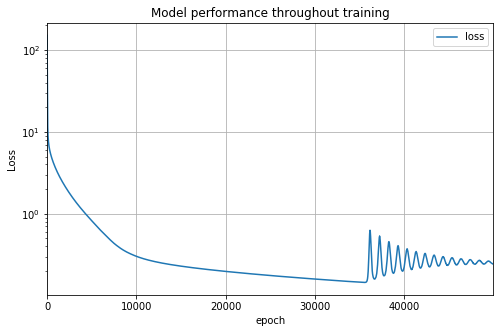

In [958]:
DataFrame(history.history).plot(figsize=(8, 5), logy=True)
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [959]:
y_pred = model.predict(X_val)

In [960]:
y_pred = y_pred.reshape(y_pred.shape[0])
y_val = y_val.reshape(y_val.shape[0])

In [961]:
RMSLE = sqrt(mean_squared_error(y_val,y_pred))
RMSLE

0.3631897140351239

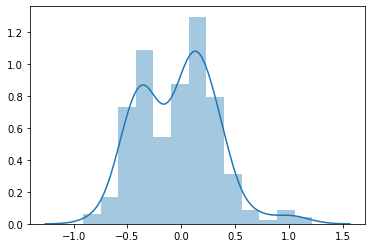

In [962]:
sns.distplot(y_pred-y_val)

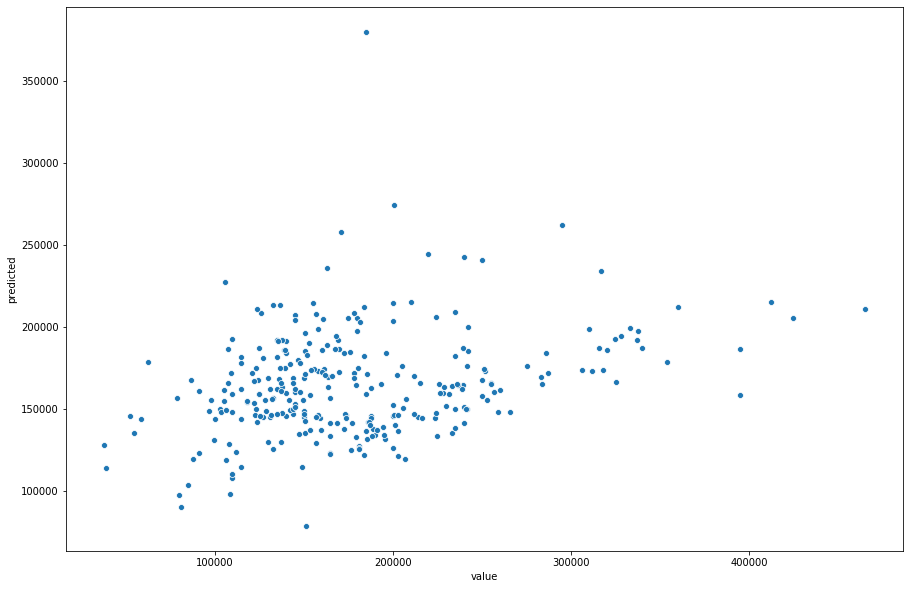

In [963]:
df = DataFrame(data={'value':np.exp(y_val), 'predicted':np.exp(y_pred)})
plt.figure(figsize=(15,10))
sns.scatterplot(x='value',y='predicted', data=df )
plt.show()

In [964]:
anomaly_idx = df['predicted'].idxmax()
print(anomaly_idx)

142


In [965]:
anomaly = X_val_df.iloc[anomaly_idx]

In [966]:
anomaly.loc[np.abs(anomaly)>1.5]

LotFrontage               2.192625
LotArea                   3.283105
MasVnrArea                3.721816
BsmtFinSF1                4.210999
TotalBsmtSF               4.881511
1stFlrSF                  5.232092
2ndFlrSF                  2.740429
FullBath                  2.614849
TotRmsAbvGrd              2.800135
GarageCars                1.634322
GarageArea                1.948454
OpenPorchSF               5.380255
MSSubClass_60             1.959126
LandContour_Lvl          -2.980160
LandContour_Bnk           4.582576
Neighborhood_Edwards      3.734798
Condition1_Norm          -2.498447
Condition1_PosN           9.417659
Condition2_Norm          -9.417659
Condition2_PosN          34.132096
HouseStyle_2Story         1.517602
OverallQual_10            9.417659
RoofStyle_Gable          -1.862104
RoofStyle_Hip             2.001073
Exterior1st_CemntBd       4.879397
MasVnrType_Stone          3.338538
ExterQual_Ex              5.110409
BsmtQual_Ex               3.338538
BsmtExposure_Gd     